<b>Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
from IPython.display import display
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For Data Augmentation

<b>Load Dataset Images

In [2]:
def load_dataset(path):
    # Define the List for Images & Labels
    Images , Labels = [] , []
    
    label = 0
    # Iterate the Dataset with the Folders
    for folderName in os.listdir(path):
        # Create the New Path for the Images
        imagesPath = os.path.join(path , folderName)
        # Iterate the Each Folder Images
        for images in os.listdir(imagesPath):
            # Define the Path of the Image
            imagePath = os.path.join(imagesPath , images)
            # Read the Image with PIL 
            pilImage = Image.open(imagePath)
            
            # Resize the Image
            resizedImage = pilImage.resize((150,150))
            
             # Convert the Numpy Array
            cv2Image = np.array(resizedImage)
            
             # Change the Type of the Image
            cv2Image = cv2Image.astype("float32")
            
            # Normalize the Data of Image
            cv2Image = cv2Image / 255
            
            # Append the Images and Labels in the List
            Images.append(cv2Image)
            Labels.append(label)
        label += 1
    return Images , Labels

In [3]:
# Define the Path of the Dataset
datasetPath = "C:/Users/User131022/Desktop/ID Card Dataset"

# Load the Dataset
Images , Labels = load_dataset(datasetPath)

# Display the Shapes of the Images and Labels
print(f"Shape of the Images is : {np.shape(Images)}")
print(f"Shape of the Labels is : {np.shape(Labels)}")

Shape of the Images is : (173, 150, 150, 3)
Shape of the Labels is : (173,)


<b>Convert Numpy Array

In [4]:
# Convert the Images and Labels into Numpy Array
Images = np.array(Images)
Labels = np.array(Labels)

# Display the Shape of the Images and Labels
print(f"Shape of the Images is : {Images.shape}")
print(f"Shape of the Labels is : {Labels.shape}")

Shape of the Images is : (173, 150, 150, 3)
Shape of the Labels is : (173,)


<b>Define Label of Dataset

In [5]:
# Define the Labels 
def class_label(index):
    label = ["B_W Back Ripped Image" , "B_W Back Image" , "B_W Back Marker Image" , "B_W Back Picture-In-Picture Image" , "B_W Front Ripped Image" , "B_W Front Image" , "B_W Front Marker Image" , "B_W Front Picture-In-Picture Image" , "Color Back Ripped Image" , "Color Back Image" , "Color Back Marker Image" , "Color Back Picture-In-Picture Image" , "Color Front Marker Image" , "Color Front Image" , "Color Front Picture-In-picture Image" , "Color Front Ripped Image" , "Original Back Image" , "Original Front Image"]
    return label[index]

<b>Visualization Actuall Dataset Images

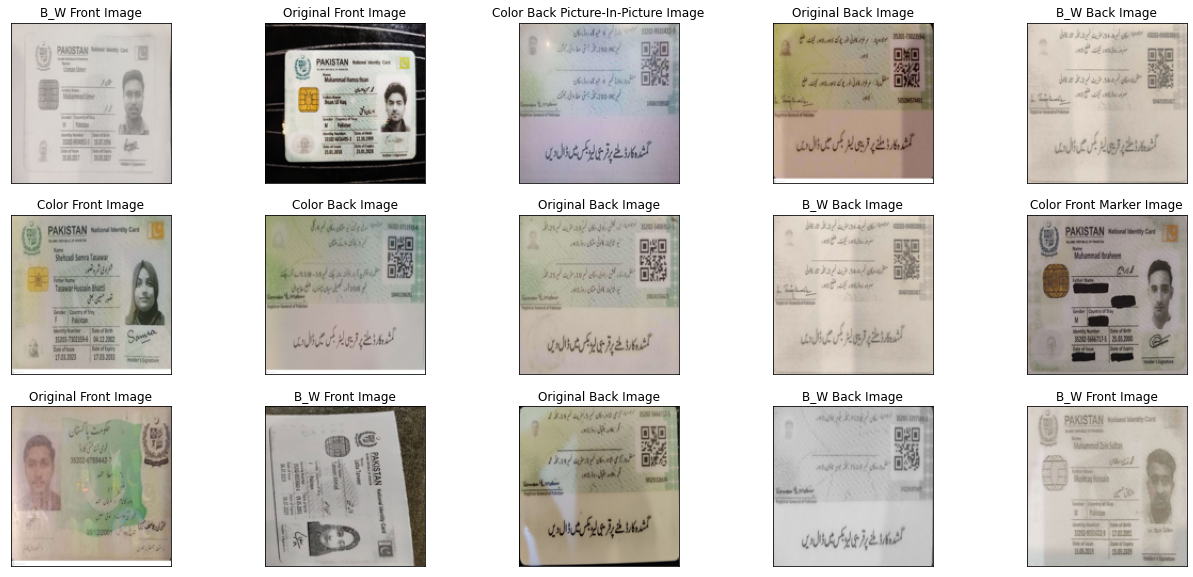

In [6]:
# Visualization Images and Labels

# Set the Figure 
plt.figure(figsize = (22,10))
for index in range(0,15):
    # Get the Radom Number
    choice = random.randint(0, len(Images)-1)
    ax = plt.subplot(3,5,index+1)
    plt.imshow(Images[choice])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_label(Labels[choice]))
plt.show()

<b>Data Augmentation (Creating New Dataset)

In [7]:
# Create Object of the ImageDataGenerator
trainDatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode="constant",
    cval = 125,
)

In [8]:
# Creating the Dataset with Directory
trainGenerator = trainDatagen.flow_from_directory(
    directory = "C:/Users/User131022/Desktop/ID Card Dataset", 
    batch_size = 16, 
    target_size = (150,150), 
    save_prefix = "shape", 
    save_format = "jpg")

Found 173 images belonging to 18 classes.


In [9]:
# Define the Augmented Dataset
augImages , augLabels =  [] , []

In [10]:
count = 1
for inputs , labels in trainGenerator:
    for index in range(len(inputs)):
        image = inputs[index]
        label = labels[index]
        
        # Convert the Image Type into Uint8 & PIL Format
        imageUint8 = (image * 255).astype(np.uint8)
        pilImage = Image.fromarray(imageUint8)
        
        augImages.append(imageUint8)
        augLabels.append(label)
        
        # Save the Augmented Images in the Folder
        imageFolderName = class_label(np.argmax(label))
        cv2.imwrite('C:\\Users\\User131022\\Desktop\\Augmented Images Dataset\\{1}\\Image{0}.jpg'.format(count , imageFolderName), imageUint8)
        
        if count == 1000:
            break  
        count += 1
        
    if count == 1000:
        break

In [11]:
# Display the Shape of the Images 
print(f"Shape of the Augmented Images is : {np.shape(augImages)}")
print(f"Shape of the Augmented Labels is : {np.shape(augLabels)}")

Shape of the Augmented Images is : (1000, 150, 150, 3)
Shape of the Augmented Labels is : (1000, 18)


In [12]:
# Convert the Numpy Array
augImages = np.array(augImages)
augLabels = np.array(augLabels)

<b>Visualization Augmented Dataset Images

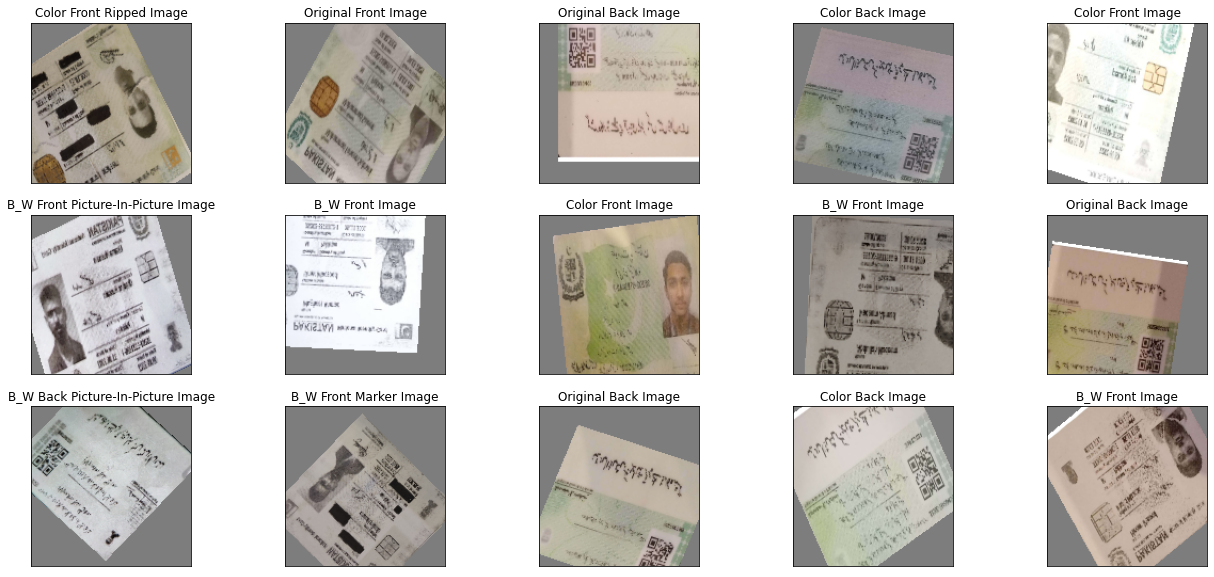

In [13]:
# Visualization Images and Labels

# Set the Figure 
plt.figure(figsize = (22,10))
for index in range(0,15):
    # Get the Radom Number
    choice = random.randint(0, len(Images)-1)
    ax = plt.subplot(3,5,index+1)
    plt.imshow(augImages[choice])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_label(np.argmax(augLabels[choice])))
plt.show()